# Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

In [2]:
table_cleaned=pd.read_csv("/content/full_table_cleaned.csv")

In [3]:
#Select only the variables of interest
table_cleaned = table_cleaned[['user_id','age', 'last_month_salary', 'number_dependents',
             'total_loan', 'more_90_days_overdue', 'using_lines_not_secured_personal_assets',
             'debt_ratio', 'default_flag']]
table_cleaned.head()

,user_id,age,last_month_salary,number_dependents,total_loan,more_90_days_overdue,using_lines_not_secured_personal_assets,debt_ratio,default_flag
0,18876,21,1308,0,0,0,1.0,1.0,0
1,24483,21,1223,0,0,15,1.0,0.0,0
2,28122,21,1164,0,0,0,1.0,1.0,0
3,12771,22,1223,0,0,15,1.0,0.0,0
4,15497,23,1300,0,0,0,1.0,1.0,0


In [4]:
#Scale the variables
scaler = MinMaxScaler()
table_cleaned_scaled = pd.DataFrame(scaler.fit_transform(table_cleaned), columns=table_cleaned.columns)
table_cleaned_scaled.head()

,user_id,age,last_month_salary,number_dependents,total_loan,more_90_days_overdue,using_lines_not_secured_personal_assets,debt_ratio,default_flag
0,0.524320,0.000000,0.083578,0.0,0.0,0.0,0.763359,1.0,0.0
1,0.680074,0.000000,0.078147,0.0,0.0,1.0,0.763359,0.0,0.0
2,0.781161,0.000000,0.074377,0.0,0.0,0.0,0.763359,1.0,0.0
3,0.354732,0.013158,0.078147,0.0,0.0,1.0,0.763359,0.0,0.0
4,0.430456,0.026316,0.083067,0.0,0.0,0.0,0.763359,1.0,0.0


In [5]:
predictors = [var for var in table_cleaned_scaled if var not in ['user_id', 'default_flag']]
predictors

['age',
 'last_month_salary',
 'number_dependents',
 'total_loan',
 'more_90_days_overdue',
 'using_lines_not_secured_personal_assets',
 'debt_ratio']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(table_cleaned_scaled, table_cleaned_scaled['default_flag'], train_size=0.80, test_size=0.20, random_state=100)

In [7]:
logmodel = LogisticRegression(class_weight='balanced') #Adjust weight
logmodel.fit(X_train[predictors], y_train)

LogisticRegression(class_weight='balanced')

In [8]:
y_pred = logmodel.predict(X_test[predictors])

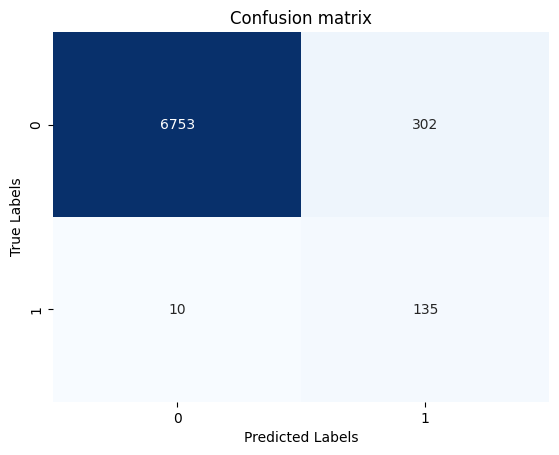

In [9]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion matrix')
plt.show()

In [10]:
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
accuracy = metrics.accuracy_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1_score}')

Accuracy: 0.9566666666666667
Precision: 0.30892448512585813
Recall: 0.9310344827586207
F1 Score: 0.46391752577319584
